In [1]:
Gradient Descent

WHJ Wood July 2019

Here i demonstrate the use of gradient descent for linear regression.

Part 1. 
Below, I have created matrices X and y. 
y is a linear combination of the columns of x as is assumed in the linear regression model.

SyntaxError: invalid syntax (<ipython-input-1-f9eb45a1d169>, line 1)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def Cost(y1,y2):
    d = np.array(y1)-np.array(y2)
    m = float(np.size(y1))

    J = (1/(2*m))*np.sum(d**2)
    return J

def Linear_fit(X,y):
    """Uses gradient descent (least-squares) to fit a linear model"""
    
    Theta = np.matrix(np.ones((1,X.shape[1])))
    print(theta)

x1 = np.matrix([1,2,3,4,5,6])
x2 = np.matrix([6,9,3,6,2,5])
x3 = np.matrix([4,5,7,3,7,3])
X = np.matrix(np.concatenate((x1,x2,x3), axis=0)).T
y = 5 + X*(np.matrix([2,1,2]).T)



def Linear_fit(X,y,iterations,learning_rate,regularise=False):
    """Uses gradient descent (least-squares) to fit a linear model"""
    
    # first we add a column of ones for the constant
    X = np.concatenate((np.matrix(np.ones((X.shape[0],1))),X), axis=1)
    
    # Then we initiate the vector representing the cofactors in the model
    Theta = np.matrix(np.zeros((1,X.shape[1]))).T
    
    cost = []
    m=X.shape[0]
    for i in range(iterations):
        
        yhat = X*Theta
        cost.append(Cost(yhat,y))
        Theta = Theta - (learning_rate/m)*(X.T*(yhat-y)) # derivative of the cost function
    coefs = Theta[1:,:]
    intercept = float(Theta[0,0])
    return coefs, intercept,cost
    

coefs,intercept, cost  = Linear_fit(X,y,10000,0.01)
print("The fitted coefficients are: ")
print(coefs,intercept)

print("y and predicted y are: ")
print(y.T)
print(np.array(coefs.T*X.T)+intercept)

plt.plot(np.array(cost))
plt.show()


The fitted coefficients are: 
[[2.09560912]
 [1.09983984]
 [2.1136435 ]] 3.5836887456316284
y and predicted y are: 
[[21 28 28 25 31 28]]
[[20.73291093 28.24168308 27.96554016 24.90609479 31.05691856 27.99747319]]


<Figure size 640x480 with 1 Axes>

It is clear that gradient descent has provided reasonable values for coefficient

close to the true values of [2,1,2].

however, the constant value of 5 i added to y has not been taken into account.

This is because the algorithm has overfitted the data and not penalised the use of feature over that of the constant.

Part 2. Regularisation

Here, we overcome the problem of overfitting by introducing regularisation into the algorithm.

the feature coefficients are penalised such that only predictive features are used and an appropriate additive constant

can be found.

To exacerbate the overfitting problem, this time i will add more feature which have no predictive value.

Increasing the number of features without increasing the amount of data often leads to overfitting as

there are more degrees of freedom in the model with more features.


The fitted coefficients without regularisation are: 
[[ 2.34896098]
 [ 1.28394471]
 [ 2.79559115]
 [-0.04822455]
 [-0.23647519]
 [-0.08976768]] 0.8340822672430663
y and predicted y are: 
[[21 28 28 25 31 28]]
[[20.99999997 28.00000012 27.99999996 24.99999968 30.99999996 28.00000023]]


The fitted coefficients with regularisation are: 
[[1.97678645]
 [0.94475122]
 [1.55755922]
 [0.19527447]
 [0.24428744]
 [0.01988124]] 4.828905478031812
y and predicted y are: 
[[21 28 28 25 31 28]]
[[20.97174279 28.23952169 27.90720668 24.51382919 30.97843267 28.16811802]]


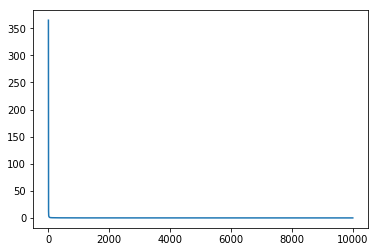

In [3]:
def Linear_fit(X,y,iterations,learning_rate,regularise=False,Regularisation_Coeff=0.01):
    """Uses gradient descent (least-squares) to fit a linear model"""
    
    # first we add a column of ones for the constant
    X = np.concatenate((np.matrix(np.ones((X.shape[0],1))),X), axis=1)
    
    # Then we initiate the vector representing the cofactors in the model
    Theta = np.matrix(np.zeros((1,X.shape[1]))).T
    cost = []

    m=X.shape[0]
    for i in range(iterations):
        
        yhat = X*Theta
        cost.append(Cost(yhat,y))
        
        if regularise==False:
            # standard gradient descent algorithm
            Theta = Theta - (learning_rate/m)*(X.T*(yhat-y))
        elif regularise==True:
            # Regularisation of features but not of constant (Theta[0,0])
            Theta[0,0] = Theta[0,0] - (learning_rate/m)*(np.sum(yhat-y))
            Theta[1:,:] = Theta[1:,:]*(1- ((learning_rate*Regularisation_Coeff)/m)) - (learning_rate/m)*((X.T*(yhat-y))[1:,:])
        else:
            print("regularise must equal True or False")
            return None
            
    coefs = Theta[1:,:]
    intercept = float(Theta[0,0])
    return coefs, intercept, cost


x1 = np.matrix([1,2,3,4,5,6])
x2 = np.matrix([6,9,3,6,2,5])
x3 = np.matrix([4,5,7,3,7,3])

# this time we have 3 more (non-predictive) columns
x4 = np.matrix([11,1,1,1,5,4])
x5 = np.matrix([0,12,13,5,9,5])
x6 = np.matrix([6,2,2,1,15,4])


X = np.matrix(np.concatenate((x1,x2,x3,x4,x5,x6), axis=0)).T
y = 5 + X*(np.matrix([2,1,2,0,0,0]).T)


coefs,intercept, cost  = Linear_fit(X,y,10000,0.01,regularise=False)
print("The fitted coefficients without regularisation are: ")
print(coefs,intercept)

print("y and predicted y are: ")
print(y.T)
print(np.array(coefs.T*X.T)+intercept)
print("\n")


coefs,intercept,cost  = Linear_fit(X,y,10000,0.01,regularise=True,Regularisation_Coeff=0.45)
print("The fitted coefficients with regularisation are: ")
print(coefs,intercept)

print("y and predicted y are: ")
print(y.T)
print(np.array(coefs.T*X.T)+intercept)

plt.plot(np.array(cost))
plt.show()

The constan of 4.8 here is much closer to the actual value of 5.
and so even with a higher number of features, it is possible to prevent overfitting with the use of regularisation.